In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Load dateset and display basic information

In [3]:
df = pd.read_csv('./datasets/full_cleaned_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Columns: 111 entries, Unnamed: 0 to marketcap
dtypes: float64(91), int64(15), object(5)
memory usage: 823.1+ KB


Calcualte the Altman-Z score for each observation (where possible)

In [17]:
df["z_score"] = 1.2*(df["totalCurrentAssets"]/df["totalAssets"]) + 1.4*df["retainedEarnings"]/df["totalAssets"] + 3.3 * (df["ebitda"]-df["depreciationAndAmortization_income_statement"])/df["totalAssets"] + 0.6*df["marketcap"] / df["totalLiabilities"] + 0.999*df["revenue"]/df["totalAssets"]
df["z_score"] = df["z_score"].round(2)
df.dropna(subset=['z_score'], inplace=True)

df_zscore_analysis = df[['symbol', 'year', 'z_score', 'distressed', 'totalCurrentAssets', 'totalAssets', 'retainedEarnings', 'ebitda', 'depreciationAndAmortization_income_statement', 'totalLiabilities', 'marketcap', 'revenue']]
df_zscore_print = df[['symbol', 'year', 'z_score', 'distressed']]
print(df_zscore_print.to_string())
df_zscore_analysis.to_csv('./datasamples/z_score_analysis.csv', index=False)

       symbol  year  z_score  distressed
0      MMM.SW  2024     4.07           0
1      MMM.SW  2023     2.29           0
2      MMM.SW  2022     4.27           0
3      MMM.SW  2021     4.96           0
4     ABBN.SW  2024     4.98           0
5     ABBN.SW  2023     4.32           0
6     ABBN.SW  2022     3.68           0
7     ABBN.SW  2021     4.39           0
8      ABT.SW  2024     5.55           0
9      ABT.SW  2023     5.30           0
10     ABT.SW  2022     5.12           0
11     ABT.SW  2021     5.76           0
12    ACLN.SW  2023     4.10           0
13    ACLN.SW  2022     3.97           0
16    ADXN.SW  2023  -113.64           0
17    ADXN.SW  2022   -64.61           0
18    ADXN.SW  2021   -16.77           0
19    ADXN.SW  2020   -15.86           0
20    ADEN.SW  2024     3.23           0
21    ADEN.SW  2023     3.55           0
22    ADEN.SW  2023     3.55           0
23    ADEN.SW  2022     3.17           0
24    ADEN.SW  2022     3.17           0
25    ADEN.SW  2

<BarContainer object of 759 artists>

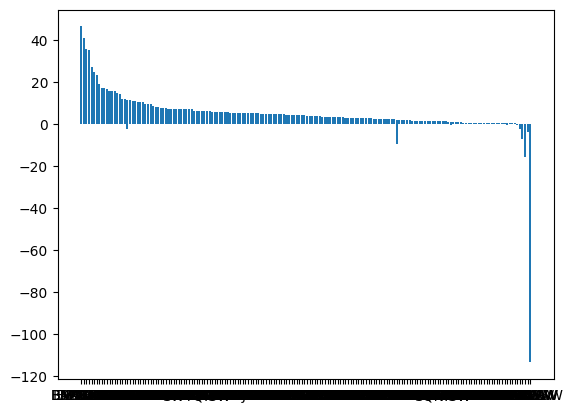

In [14]:
# barchart of df_zscore_analysis	
df_zscore_analysis = df_zscore_analysis.sort_values(by=['z_score'], ascending=False)

plt.bar(df_zscore_analysis['symbol'], df_zscore_analysis['z_score'])
